<a href="https://colab.research.google.com/github/MANISH-KUMAR-CODES/Bank-Marketing-Effectiveness-Prediction/blob/main/Bank_Marketing_Effectiveness_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predicting the effectiveness of bank marketing campaigns </u></b>

## <b> Problem Description </b>

### The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. The classification goal is to predict if the client will subscribe a term deposit (variable y).


## <b> Data Description </b>

## <b>Input variables: </b>
### <b> Bank Client data: </b>

* ### age (numeric)
* ### job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
* ### marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
* ### education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
* ### default: has credit in default? (categorical: 'no','yes','unknown')
* ### housing: has housing loan? (categorical: 'no','yes','unknown')
* ### loan: has personal loan? (categorical: 'no','yes','unknown')

### <b> Related with the last contact of the current campaign:</b>
* ### contact: contact communication type (categorical: 'cellular','telephone')
* ### month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
* ### day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
* ### duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

### <b>Other attributes: </b>
* ### campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
* ### pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
* ### previous: number of contacts performed before this campaign and for this client (numeric)
* ### poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')


### <b>Output variable (desired target):</b>
* ### y - has the client subscribed a term deposit? (binary: 'yes','no')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Import all the tools we need

# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline 

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

In [4]:
#importing our bank_full csv file
bank_data = pd.read_csv('/content/drive/MyDrive/Copy of bank-full.csv',delimiter=';')
bank_data = bank_data.drop(['duration'],axis=1)

In [5]:
# Checking first 10 rows
bank_data.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,1,-1,0,unknown,no


### We have dropped the 'duration' variable as the value of the variable will only be known at the end of the call. Hence, at that time we will also know the outcome of the call. The 'duration' variable will lead to leakage in the data and the prediction model will not be realistic.

In [6]:
#Checking last 10 Rows
bank_data.tail(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y
45201,53,management,married,tertiary,no,583,no,no,cellular,17,nov,1,184,4,success,yes
45202,34,admin.,single,secondary,no,557,no,no,cellular,17,nov,1,-1,0,unknown,yes
45203,23,student,single,tertiary,no,113,no,no,cellular,17,nov,1,-1,0,unknown,yes
45204,73,retired,married,secondary,no,2850,no,no,cellular,17,nov,1,40,8,failure,yes
45205,25,technician,single,secondary,no,505,no,yes,cellular,17,nov,2,-1,0,unknown,yes
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,2,188,11,other,no


In [7]:
#Checking shape of our data
bank_data.shape

(45211, 16)

In [8]:
#Checking info of our data
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  campaign   45211 non-null  int64 
 12  pdays      45211 non-null  int64 
 13  previous   45211 non-null  int64 
 14  poutcome   45211 non-null  object
 15  y          45211 non-null  object
dtypes: int64(6), object(10)
memory usage: 5.5+ MB


In [9]:
# Checking null values
bank_data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

### From the above we can see that our data contains 45211 rows and 16 columns with columns of int type are 7 and columns of type object are 10,also our data contains no null values

In [10]:
#Checking Descriptive summary of data
bank_data.describe(include = 'all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y
count,45211.000000,45211,45211,45211,45211,45211.000000,45211,45211,45211,45211.000000,45211,45211.000000,45211.000000,45211.000000,45211,45211
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,4,2
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,unknown,no
freq,NaN,9732,27214,23202,44396,NaN,25130,37967,29285,NaN,13766,NaN,NaN,NaN,36959,39922
mean,40.936210,NaN,NaN,NaN,NaN,1362.272058,NaN,NaN,NaN,15.806419,NaN,2.763841,40.197828,0.580323,NaN,NaN
std,10.618762,NaN,NaN,NaN,NaN,3044.765829,NaN,NaN,NaN,8.322476,NaN,3.098021,100.128746,2.303441,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,72.000000,NaN,NaN,NaN,8.000000,NaN,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,448.000000,NaN,NaN,NaN,16.000000,NaN,2.000000,-1.000000,0.000000,NaN,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1428.000000,NaN,NaN,NaN,21.000000,NaN,3.000000,-1.000000,0.000000,NaN,NaN


### Our some columns does'nt look meaningfull ,lets change names for that columns so it look good

In [11]:
#checking our data columns
bank_data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'campaign', 'pdays', 'previous',
       'poutcome', 'y'],
      dtype='object')

In [12]:
# changing some names of columns
bank_data.columns = ['age', 'job', 'marital', 'education', 'credit_in_default', 'balance', 'housing',
                    'loan', 'contact', 'day_of_month', 'month', 'campaign', 'pdays',
                    'previous_compaign_contacts', 'previous_compaign_outcome', 'Subscribed']

In [13]:
#checkinh head()
bank_data.head(5)

,age,job,marital,education,credit_in_default,balance,housing,loan,contact,day_of_month,month,campaign,pdays,previous_compaign_contacts,previous_compaign_outcome,Subscribed
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,1,-1,0,unknown,no


# **Exploratory Data Analysis**
Exploratory data analysis (EDA) is used by data scientists to analyze and investigate data sets and summarize their main characteristics, often employing data visualization methods. It helps determine how best to manipulate data sources to get the answers you need, making it easier for data scientists to discover patterns, spot anomalies, test a hypothesis, or check assumptions.



### we have categorical and numerical columns present in our data,lets plots various graphs to check various trends in our data

## **Graphs on categorical columns**

In [14]:
#various categorical columns
categorical_column = ['job', 'marital', 'education', 'credit_in_default','loan', 'housing','contact','month','previous_compaign_outcome']
categorical_column

['job',
 'marital',
 'education',
 'credit_in_default',
 'loan',
 'housing',
 'contact',
 'month',
 'previous_compaign_outcome']

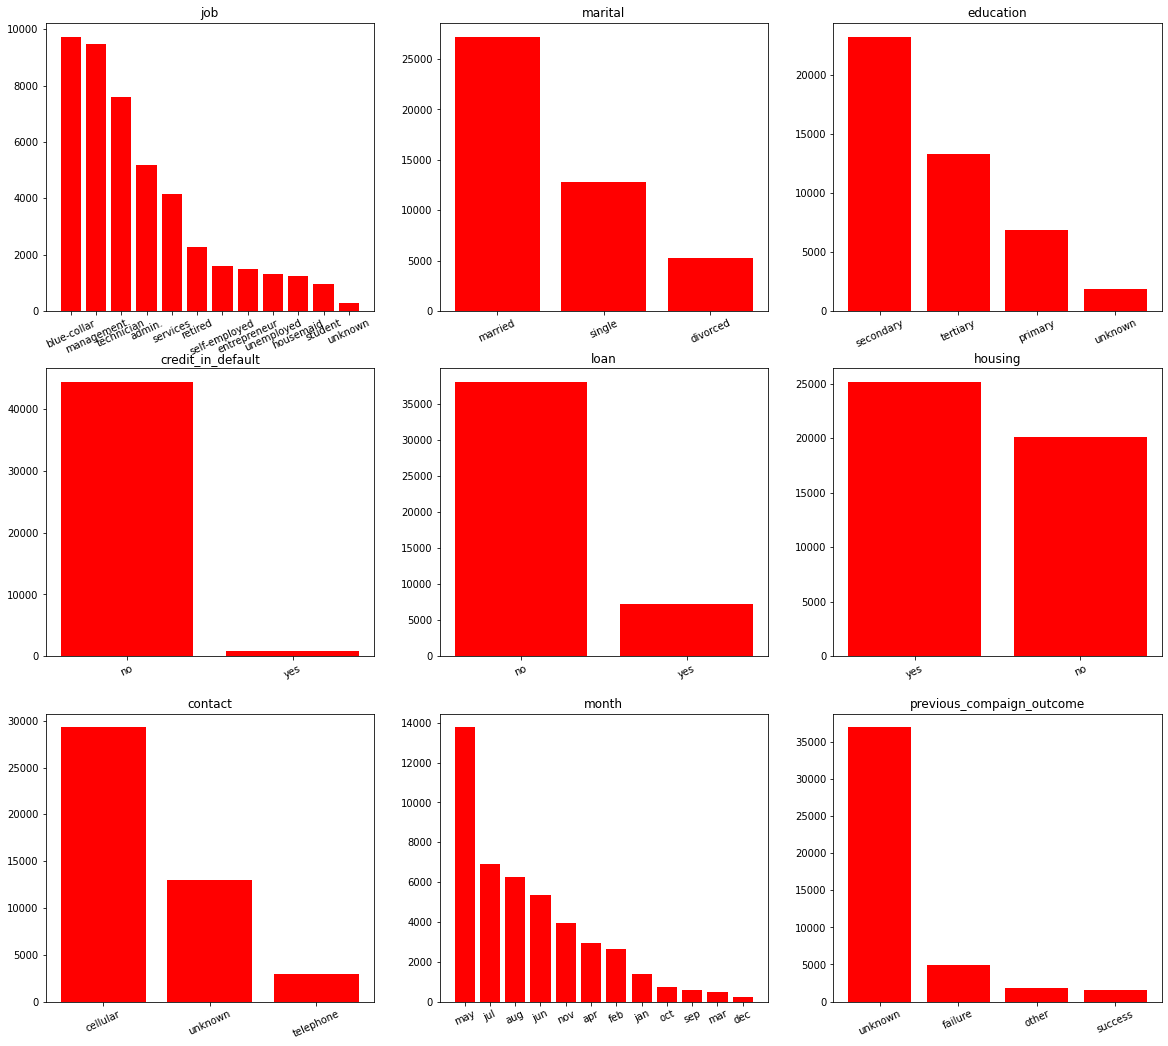

In [15]:
# Defining area for our subplots
fig, ax = plt.subplots(3, 3, figsize=(20, 18))
count = 0
#using for loop
for cat_column in categorical_column:
    value_counts = bank_data[cat_column].value_counts()

    # setting position for each plot
    x_position = count // 3
    y_position = count % 3
    x_pos = np.arange(0, len(value_counts))

    count += 1
    ax[x_position, y_position].bar(x_pos, value_counts.values, tick_label = value_counts.index,color = 'r')
    #title for each graph
    ax[x_position, y_position].set_title(cat_column)
    
    for label in ax[x_position, y_position].get_xticklabels():
        label.set_rotation(25)
plt.show()    

From the above plots we can say:

1.Blue-collar , Management, Technician are the top 3 types of jobs in our dataset.

2.married people and people with secondary education have high number of counts in our dataset.

3.There are around 25000 people who have hosing loan which is very high in number in comparision to people with personal loan ,also there are very less peoplw with credit in default.

4.Contact made to people through cellular network was high in number in the month of may ,july,aug.

5.A lot of data is unknown realted to success or failure of previous campaign outcome

## **Graphs on numerical columns**

In [16]:
#various numerical columns
numeric_columns = ['balance', 'day_of_month','campaign', 'pdays', 'previous_compaign_contacts']
numeric_columns

['balance', 'day_of_month', 'campaign', 'pdays', 'previous_compaign_contacts']

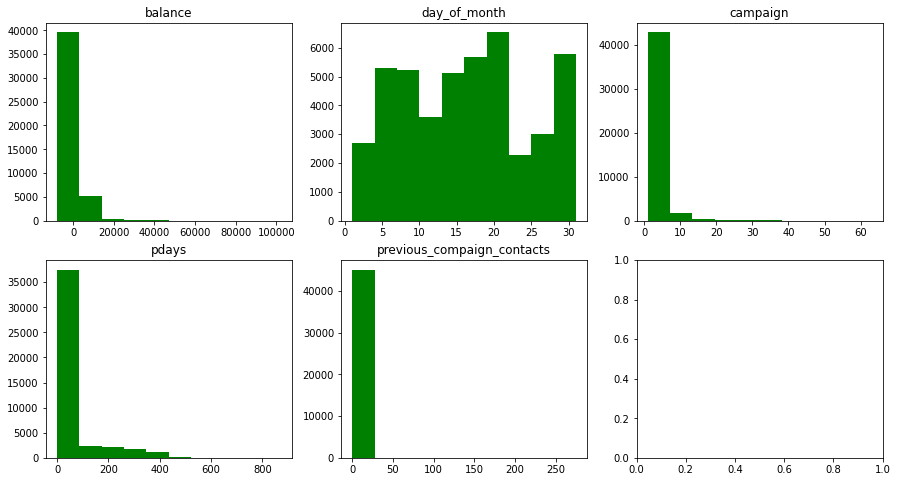

In [17]:
#Defining area for our subplots
fig, ax = plt.subplots(2, 3, figsize=(15, 8))
count = 0
# using for loop
for column in numeric_columns:
    
    # setting position of each plots
    trace_x = count // 3
    trace_y = count % 3
    #increasing the count after each iteration
    count += 1
    
    ax[trace_x, trace_y].hist(bank_data[column],color = 'g')
    ax[trace_x, trace_y].set_title(column)
#checking our plot
plt.show()

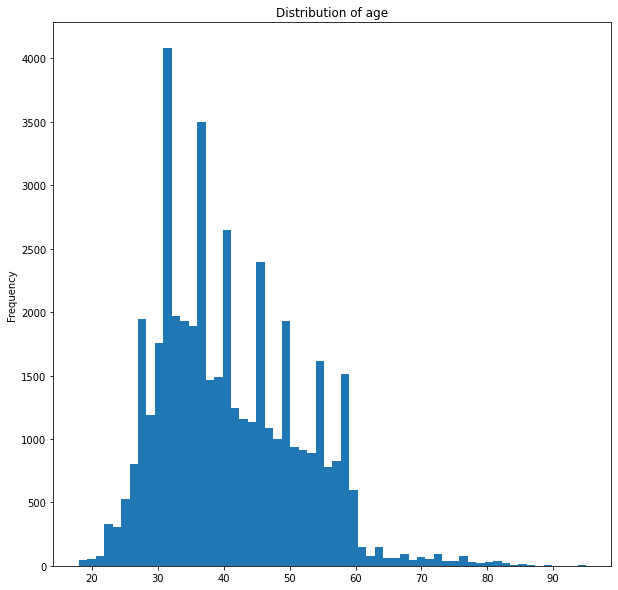

In [18]:
# check the distribution of age 
bank_data['age'].sort_values(ascending = False).plot(kind = 'hist',title ='Distribution of age',bins = 60,figsize = (10,10))

From the above graph we can say that our dataset contains lots of people within the range of 25-60 ,the company usually target people with good job and money so they can accept bank term deposit

## **Detecting outliers using box plots**

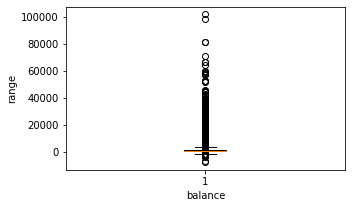

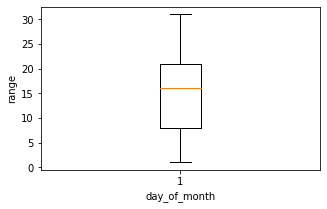

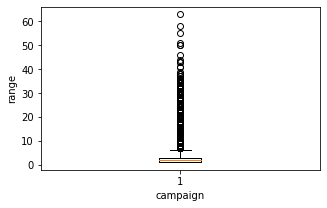

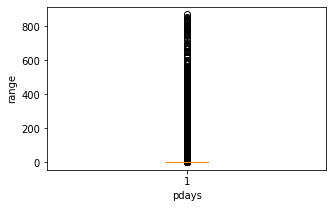

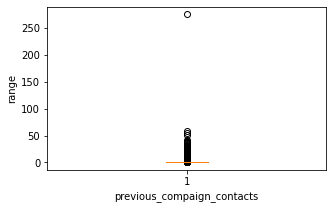

In [19]:
# Box plot using for loop
for col in numeric_columns:
    # setting fig size
    fig = plt.figure(figsize=(5, 3))
    ax = fig.gca()
    feature = bank_data[col]
    #code for boxplot
    plt.boxplot(x=feature)
    plt.xlabel(col)
    plt.ylabel('range')
plt.show()

We can see that numerical columns have outliers (especially ,'balance', pdays', 'campaign' and 'previous_campaign' columns). Possibly there are incorrect values (noisy data), so we should look closer at the data and decide how do we manage the noise.

## lets plot various relations between our dependent variable("Subscribed") and independent features available in our data

In [20]:
bank_data.columns

Index(['age', 'job', 'marital', 'education', 'credit_in_default', 'balance',
       'housing', 'loan', 'contact', 'day_of_month', 'month', 'campaign',
       'pdays', 'previous_compaign_contacts', 'previous_compaign_outcome',
       'Subscribed'],
      dtype='object')

### **On categorical columns**

In [28]:
#categorical columns
categorical_column = ['job', 'marital', 'education','contact','month','previous_compaign_outcome']

In [32]:
'''
   Here we have define various function which will create a new dataframe containing columns related to the values counts
   of our target variables ('yes' and 'no'),it will return a graph of our each dataframe in each function when called individually
'''
#for job column
def job(Data):   
    job_df = pd.DataFrame()
    job_df['yes'] = Data[Data['Subscribed'] == 'yes']['job'].value_counts()
    job_df['no'] = Data[Data['Subscribed'] == 'no']['job'].value_counts()
    return job_df.plot.bar(title = 'Job and Subscribed')
# for marital colum    
def marital(Data):
    marital_df =pd.DataFrame()
    marital_df['yes'] = Data[Data['Subscribed'] == 'yes']['marital'].value_counts()
    marital_df['no'] = Data[Data['Subscribed'] == 'no']['marital'].value_counts()
    return marital_df.plot(kind = 'pie',title = 'marital and Subscribed',subplots=True, autopct='%1.0f%%',figsize=(16,5))
# for education column    
def education(Data):    
    education_df =pd.DataFrame()
    education_df['yes'] = Data[Data['Subscribed'] == 'yes']['education'].value_counts()
    education_df['no'] = Data[Data['Subscribed'] == 'no']['education'].value_counts()
    return education_df.plot(kind = 'pie',title = 'education and Subscribed',subplots=True, autopct='%1.0f%%',figsize=(16,5))
# for contact column        
def contact(Data):    
    contact_df =pd.DataFrame()
    contact_df['yes'] = Data[Data['Subscribed'] == 'yes']['contact'].value_counts()
    contact_df['no'] = Data[Data['Subscribed'] == 'no']['contact'].value_counts()
    return contact_df.plot.bar(title = 'contact and Subscribed')  
# for month column      
def month(Data):    
    month_df =pd.DataFrame()
    month_df['yes'] = Data[Data['Subscribed'] == 'yes']['month'].value_counts()
    month_df['no'] = Data[Data['Subscribed'] == 'no']['month'].value_counts()
    return month_df.plot.bar(title = 'month and Subscribed')
# for campaign outcome column    
def compaign_outcome(Data):    
    previous_compaign_outcome_df =pd.DataFrame()
    previous_compaign_outcome_df['yes'] = Data[Data['Subscribed'] == 'yes']['previous_compaign_outcome'].value_counts()
    previous_compaign_outcome_df['no'] = Data[Data['Subscribed'] == 'no']['previous_compaign_outcome'].value_counts()
    return previous_compaign_outcome_df.plot.bar(title = 'previous_compaign_outcome and Subscribed')    

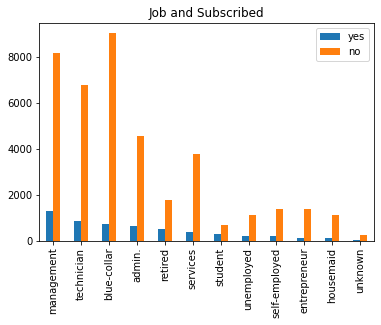

In [30]:
# plotting bar graph on Job
job(bank_data)

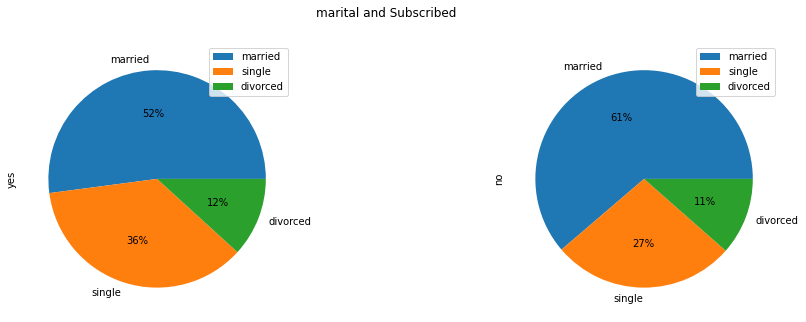

In [31]:
# plotting pie chart
marital(bank_data);

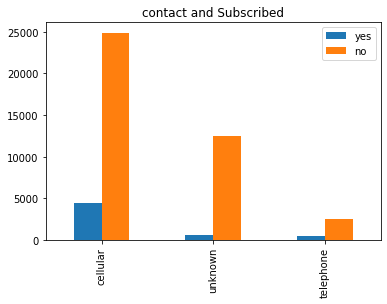

In [25]:
# plotting bar graph on contact
contact(bank_data)

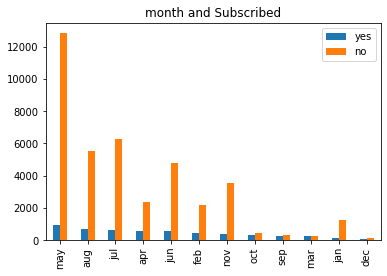

In [26]:
# plotting bar graph on month
month(bank_data);

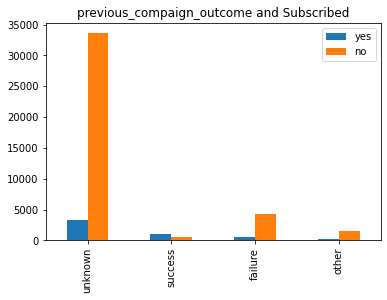

In [27]:
#plotting bar graph on campaign outcome
compaign_outcome(bank_data)


Regarding the diagrams we can tell that according to our dataset:

Customers with 'blue-collar' and 'services' jobs are less likely to subscribe for term deposit.
Married customers are less likely to subscribe for term deposit.
Customers with 'cellular' type of contact are less likely to subscribe for term deposit.

### **On numerical columns**

In [33]:
numeric_columns = ['balance', 'day_of_month','duration', 'campaign', 'pdays', 'previous_compaign_contacts']

In [34]:
#making dataframe between balance and subscribed
balance_df = pd.DataFrame()
balance_df['balance_yes'] = (bank_data[bank_data['Subscribed'] == 'yes'][['Subscribed','balance']].describe())['balance']
balance_df['balance_no'] = (bank_data[bank_data['Subscribed'] == 'no'][['Subscribed','balance']].describe())['balance']
balance_df

,balance_yes,balance_no
count,5289.000000,39922.000000
mean,1804.267915,1303.714969
std,3501.104777,2974.195473
min,-3058.000000,-8019.000000
25%,210.000000,58.000000
50%,733.000000,417.000000
75%,2159.000000,1345.000000
max,81204.000000,102127.000000


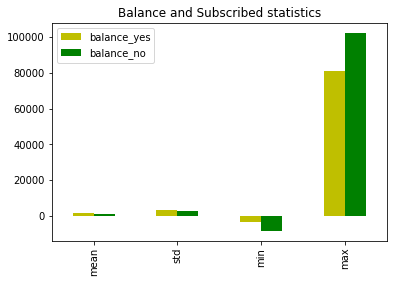

In [35]:
#plotting bar graph
balance_df.drop(['count', '25%', '50%', '75%']).plot.bar(title = 'Balance and Subscribed statistics',color =['y','g'])

In [36]:
# making dataframe  on age and subscribed
age_df = pd.DataFrame()
age_df['age_yes'] = (bank_data[bank_data['Subscribed'] == 'yes'][['Subscribed','age']].describe())['age']
age_df['age_no'] = (bank_data[bank_data['Subscribed'] == 'no'][['Subscribed','age']].describe())['age']
age_df

,age_yes,age_no
count,5289.000000,39922.000000
mean,41.670070,40.838986
std,13.497781,10.172662
min,18.000000,18.000000
25%,31.000000,33.000000
50%,38.000000,39.000000
75%,50.000000,48.000000
max,95.000000,95.000000


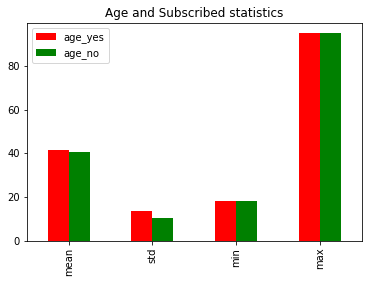

In [37]:
#plotting graph
age_df.drop(['count', '25%', '50%', '75%']).plot.bar(title = 'Age and Subscribed statistics',color =['r','g'])

In [38]:
# making dataframe on campaign and subscribed
campaign_df = pd.DataFrame()
campaign_df['campaign_yes'] = (bank_data[bank_data['Subscribed'] == 'yes'][['Subscribed','campaign']].describe())['campaign']
campaign_df['campaign_no'] = (bank_data[bank_data['Subscribed'] == 'no'][['Subscribed','campaign']].describe())['campaign']

campaign_df

,campaign_yes,campaign_no
count,5289.000000,39922.000000
mean,2.141047,2.846350
std,1.921826,3.212767
min,1.000000,1.000000
25%,1.000000,1.000000
50%,2.000000,2.000000
75%,3.000000,3.000000
max,32.000000,63.000000


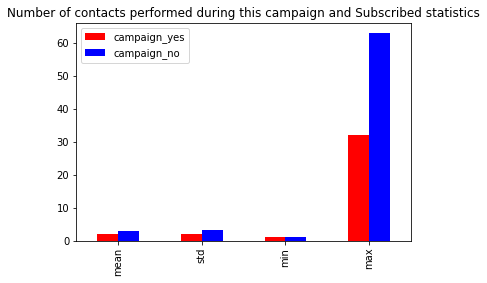

In [39]:
#plotting graph
campaign_df.drop(['count', '25%', '50%', '75%']).plot.bar(title = 'Number of contacts performed during this campaign and Subscribed statistics',color =['r','b'])

In [40]:
#number of contacts performed during previous campaign ('previous') and Subscribed
previous_df = pd.DataFrame()
previous_df['previous_yes'] = (bank_data[bank_data['Subscribed'] == 'yes'][['Subscribed','previous_compaign_contacts']].describe())['previous_compaign_contacts']
previous_df['previous_no'] = (bank_data[bank_data['Subscribed'] == 'no'][['Subscribed','previous_compaign_contacts']].describe())['previous_compaign_contacts']

previous_df

,previous_yes,previous_no
count,5289.000000,39922.000000
mean,1.170354,0.502154
std,2.553272,2.256771
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,1.000000,0.000000
max,58.000000,275.000000


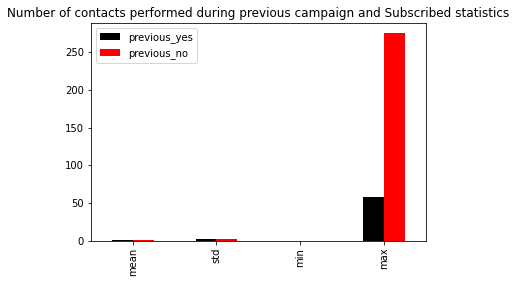

In [41]:
# plotting graph
previous_df.drop(['count', '25%', '50%', '75%']).plot.bar(title = 'Number of contacts performed during previous campaign and Subscribed statistics',color =['black','r'])

Looking at the diagrams above we can conclude that:

People who subscribed for term deposit tend to have greater balance and age values.
People who subscribed for term deposit tend to have fewer number of contacts during this campaign.

## **CORRELATION**
A correlation heatmap is a heatmap that shows a 2D correlation matrix between two discrete dimensions, using colored cells to represent data from usually a monochromatic scale. The values of the first dimension appear as the rows of the table while of the second dimension as a column

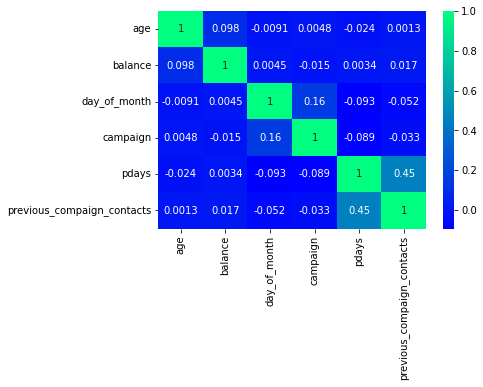

In [42]:
# plotting correlation heatmap between numerical columns
dataplot = sns.heatmap(bank_data.corr(), cmap="winter", annot=True)

From the above correlation plot we can see that there is hardly any correlation between our numerical variables except pdays and previous campaign contacts with correlation of 0.45

## **CONCLUSION FROM EDA**

Customers with jobs in management ,technician , blue-collar along with marrie customers are more likely to say yes to term deposit.

Customers contacted through cellular in the month of may, aug , july showed intrest in term deposit.

Customers of greater age are more likely to subscribe for the term deposit.

Customers with greater account balance are more likely to subscribe for the term deposit.

Number of contacts with the customers really matters. Too many contacts with the customer could make him decline the offer.

## **DATA CLEANING**
Before we will be able to apply machine learning techniques, we should prepare the dataset for processing:

1.Removing unnecessary columns

2.Converting categorical variables into dummy variables





In [43]:
# checking our pdays column of our dataframe
bank_data.pdays.value_counts()

-1      36954
 182      167
 92       147
 91       126
 183      126
        ...  
 449        1
 452        1
 648        1
 595        1
 530        1
Name: pdays, Length: 559, dtype: int64

### Here in pdays column more than 50% of data has value -1 and we have no information about what this -1 belongs to, maybe it can be count of members who were not contacted before or maybe it denotes people who were contacted but gave no response, it can also be represented as null values . so its best to drop this column before fitting in our models

In [44]:
# dropping pdays column
bank_data = bank_data.drop('pdays',axis = 1)

In [45]:
#checking our data shape again
bank_data.shape

(45211, 15)

## **ONE-HOT ENCODING**

One-Hot Encoding is another popular technique for treating categorical variables. It simply creates additional features based on the number of unique values in the categorical feature. Every unique value in the category will be added as a feature

In [46]:
# using one-hot encoding 
one_hot_encoded_data = pd.get_dummies(bank_data, columns = ['job','credit_in_default','housing','loan','marital', 'education','contact',
                                                            'month','previous_compaign_outcome','Subscribed'],drop_first=True)
bank_data_new = one_hot_encoded_data
#checking our data shape again
bank_data_new.shape

(45211, 41)

### **Correleation plot after One-Hot Encoding**

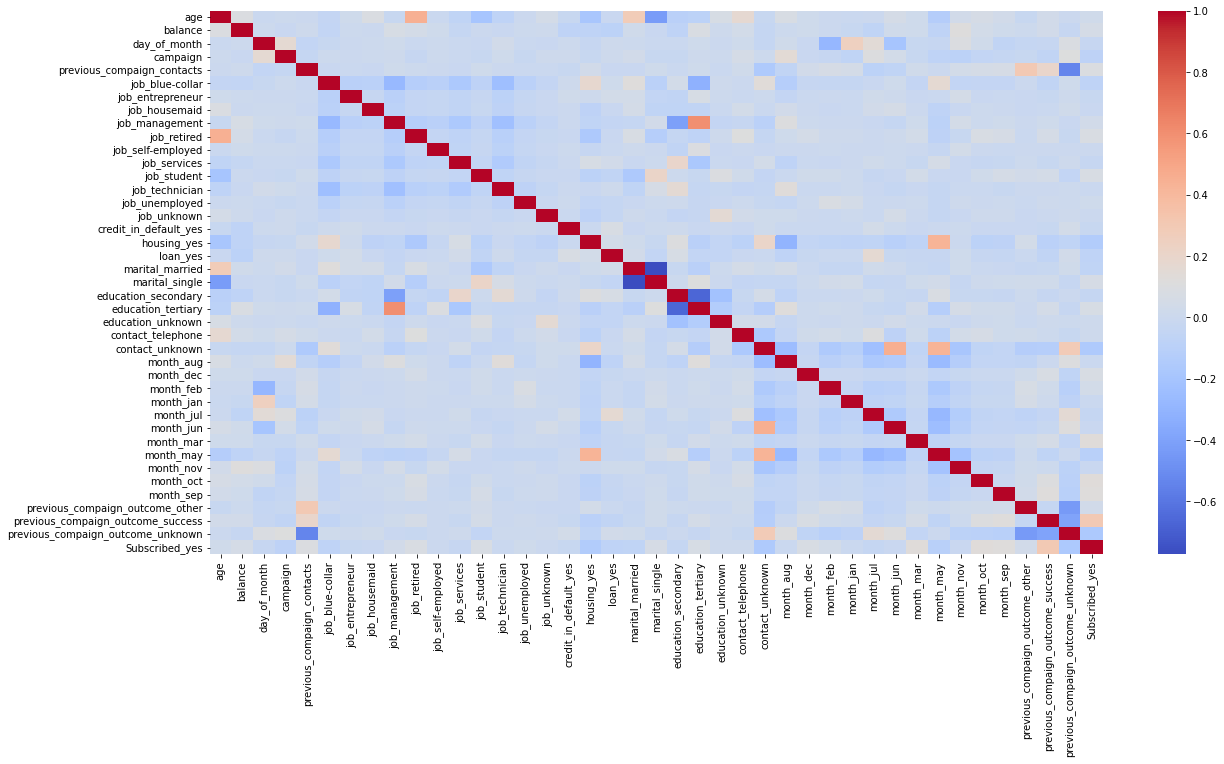

In [47]:
# plotting correlation heatmap between numerical columns
plt.figure(figsize =(20,10))
dataplot = sns.heatmap(bank_data_new.corr(), cmap="coolwarm")

### we can see that our target variable "yes" has some good correlation with 'duration', 'previous campaign contacts','previous campaign outcome success'.We expect to see these independent variables as significant while building the models. 

# **Applying various models**

## lets us first check what's the distribution of our target variable

no     39922
yes     5289
Name: Subscribed, dtype: int64




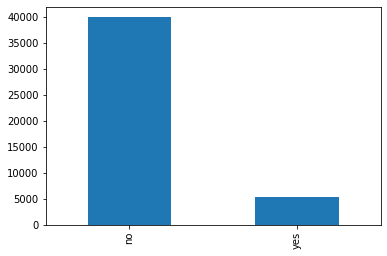

In [48]:
# using bar graph to check our target variable distribution
print(bank_data['Subscribed'].value_counts())
print('\n')
bank_data['Subscribed'].value_counts().plot(kind = 'bar')

## From the above plot we can clearly see heavily imbalanced data in our target variables. so considering this we will distribute our analysis in two parts. First model we will try to predict on same data and on Second model we will try to predict by balancing our target variable using various balancing techniques

## **Here is what we will do in both our models:**

1.Split the data into X(independent features), y(dependent features)

2.Using sklearn split X and y into Train and test set

3.Scaling our data using StandardScaler

4.Applying various machine learning algorithms such as LogisticRegression,      K-nearest Neighbours, Support vector machines ,XGBoost classifier

5.Checking best accuracy and evaluation metrics of each algorithms

6.Applying  various Hyperparameter Optimization techniques

# **MODEL 1 : With Imbalanced Target Variable**

In [49]:
# Assainging our X and y values for testing various models
X = bank_data_new.drop('Subscribed_yes',axis = 1)
y = bank_data_new['Subscribed_yes']

In [77]:
#Dividing data in test and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print('train:', len(X_train), 'test:', len(X_test))

train: 36168 test: 9043


### Data scaling will be done as follows :
Scaling the target value is a good idea in modelling; scaling of the data makes it easy for a model to learn and understand the problem. Scaling of the data comes under the set of steps of data pre-processing when we are performing machine learning algorithms in the data set.

In [78]:
# impoting standardscaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
#fitting our x_train
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### we build the various model and evaluate it using the ROC curve and the AUC values. Since we know that the positive and the negative class are heavily imbalanced, the ROC curve and the AUC values are appropriate evaluation metrics as compared to the accuracy. For all the future models, the ROC curve and the AUC values are used as the evaluation metric.

# **logistic regression**

In [79]:
# instantiate a logistic regression model, and fit with X and y
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model = model.fit(X_train, y_train)

# check the accuracy on the training set
print(model.score(X_train, y_train),'\n')
# predict will give the predited result for test set
y_pred = model.predict(X_test)
print('y_pred values are:',y_pred)

0.8934970139349702 

y_pred values are: [0 0 0 ... 0 0 0]


### Evaluating Metrics

Confusion Matrix:


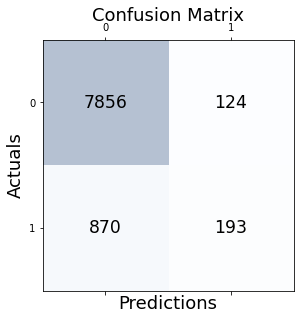



Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      7980
           1       0.61      0.18      0.28      1063

    accuracy                           0.89      9043
   macro avg       0.75      0.58      0.61      9043
weighted avg       0.87      0.89      0.86      9043



Accuracy ON TEST SET : 0.8900807254229791


In [80]:
# importing various evaluation metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
# Print the confusion matrix using Matplotlib
fig, ax = plt.subplots(figsize=(4.5, 6))
ax.matshow(result, cmap=plt.cm.Blues, alpha=0.3)
for i in range(result.shape[0]):
    for j in range(result.shape[1]):
        ax.text(x=j, y=i,s=result[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()
print('\n')
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
print('\n')
# Calculate the accuracy of the model
result2 = accuracy_score(y_test,y_pred)
print("Accuracy ON TEST SET :",result2)

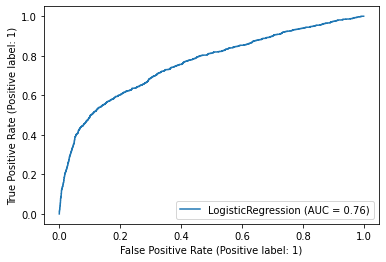

In [81]:
# Plot ROC curve 
plot_roc_curve(model, X_test, y_test);

# **K-Nearest Neighbors Classifier**

In [82]:
# Import necessary modules
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
# fitting X_train and y_train 
knn.fit(X_train, y_train)
# predicting values on x_test
y_pred = knn.predict(X_test)
print(y_pred)

[0 0 0 ... 0 0 0]


## Evaluating Metrics

Confusion Matrix:


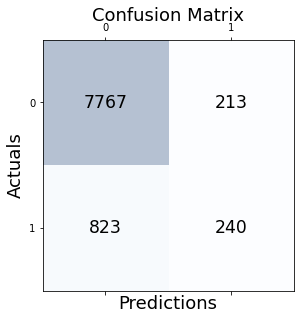



Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.97      0.94      7980
           1       0.53      0.23      0.32      1063

    accuracy                           0.89      9043
   macro avg       0.72      0.60      0.63      9043
weighted avg       0.86      0.89      0.86      9043



Accuracy: 0.8854362490324007


In [83]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
# Print the confusion matrix using Matplotlib
fig, ax = plt.subplots(figsize=(4.5, 6))
ax.matshow(result, cmap=plt.cm.Blues, alpha=0.3)
for i in range(result.shape[0]):
    for j in range(result.shape[1]):
        ax.text(x=j, y=i,s=result[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()
print('\n')
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
print('\n')
# Calculate the accuracy of the model
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

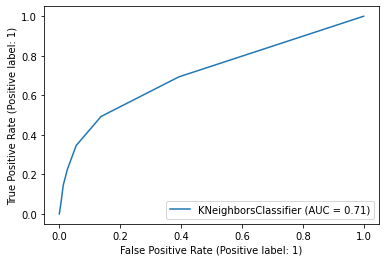

In [84]:
# Plot ROC curve 
plot_roc_curve(knn, X_test, y_test);

## **Support Vector Machines(SVMs)**

In [85]:
# import support vector classifier 
# "Support Vector Classifier"
from sklearn.svm import SVC  
clf = SVC(kernel='rbf') 
  
# fitting x samples and y classes 
clf.fit(X_train, y_train) 

SVC()

In [86]:
y_pred = clf.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

### Evaluating Metrics

Confusion Matrix:


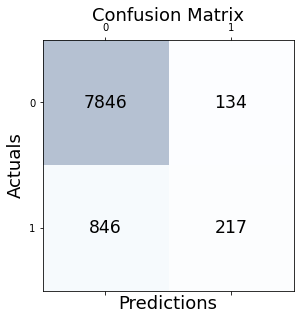



Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      7980
           1       0.62      0.20      0.31      1063

    accuracy                           0.89      9043
   macro avg       0.76      0.59      0.62      9043
weighted avg       0.87      0.89      0.87      9043



Accuracy: 0.8916288842198385


In [87]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
# Print the confusion matrix using Matplotlib
fig, ax = plt.subplots(figsize=(4.5, 6))
ax.matshow(result, cmap=plt.cm.Blues, alpha=0.3)
for i in range(result.shape[0]):
    for j in range(result.shape[1]):
        ax.text(x=j, y=i,s=result[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()
print('\n')
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
print('\n')
# Calculate the accuracy of the model
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

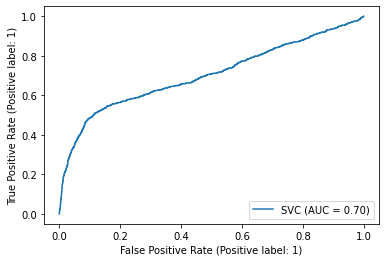

In [88]:
# Plot ROC curve 
plot_roc_curve(clf, X_test, y_test);

# **HYPERPARAMETER OPTIMIZATION**
Machine learning models have hyperparameters.

Hyperparameters are points of choice or configuration that allow a machine learning model to be customized for a specific task or dataset.
The scikit-learn Python open-source machine learning library provides techniques to tune model hyperparameters.

Specifically, it provides the RandomizedSearchCV for random search and GridSearchCV for grid search. Both techniques evaluate models for a given hyperparameter vector using cross-validation

### **Using GridSearchCv on logistic regression**

In [89]:
# grid search logistic regression model on imbalanced data
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

# define model
model = LogisticRegression()
# define evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define search space
space = dict()
space['solver'] = ['liblinear']
space['penalty'] = ['l1', 'l2']
space['C'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]
# define search
search = GridSearchCV(model, space, scoring='accuracy', n_jobs=-1, cv=cv)
# execute search
result = search.fit(X_train, y_train)
# summarize result
print('Best Score on trainning data: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score on trainning data: 0.8939116908804131
Best Hyperparameters: {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}


In [90]:
# predicting on test data
y_pred_logistic = result.predict(X_test)

In [91]:
# accuracy on test data
result1 = accuracy_score(y_test,y_pred_logistic)
print("Accuracy on test data:",result1)

Accuracy on test data: 0.8901913081941834


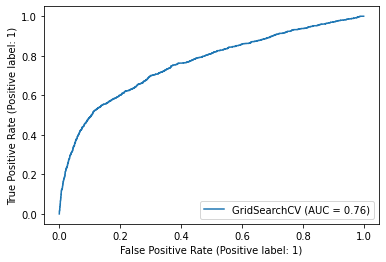

In [92]:
# Plot ROC curve 
plot_roc_curve(result, X_test, y_test);

## **Using RandomSearchCv on logisticregression**

In [93]:
# random search logistic regression model 
from scipy.stats import loguniform
from sklearn.model_selection import RandomizedSearchCV

# define model
model1 = LogisticRegression()
# define evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define search space
space = dict()
space['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
space['penalty'] = ['none', 'l1', 'l2', 'elasticnet']
space['C'] = loguniform(1e-5, 100)
# define search
search = RandomizedSearchCV(model1, space, n_iter=50, scoring='accuracy', n_jobs=-1, cv=cv, random_state=1)
# execute search
result = search.fit(X_train, y_train)
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.8939485665853562
Best Hyperparameters: {'C': 0.013653836035069424, 'penalty': 'l1', 'solver': 'liblinear'}


In [94]:
# predicting on test data
y_pred_logistic1 = result.predict(X_test)

In [95]:
#accuracy on test data
result2 = accuracy_score(y_test,y_pred_logistic1)
print("Accuracy on test data:",result2)

Accuracy on test data: 0.8899701426517749


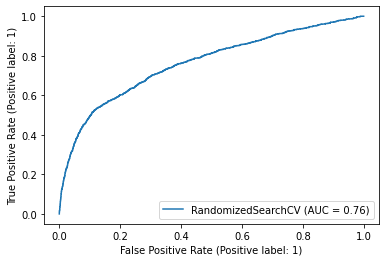

In [96]:
# Plot ROC curve 
plot_roc_curve(result, X_test, y_test);

## **Feature Importance**
Feature importance is another as asking, "which features contributed most to the outcomes of the model and how did they contribute?"

Finding feature importance is different for each machine learning model. One way to find feature importance is to search for "(MODEL NAME) feature importance".

Let's find the feature importance for our LogisticRegression model...

In [97]:
# Fit an instance of LogisticRegression
clf = LogisticRegression(C=0.013653836035069424,  # use best value for c we got from randomsearchcv
                         solver="liblinear")

clf.fit(X_train, y_train);

In [98]:
# Check coef_
clf.coef_

array([[ 0.00128824,  0.04874414,  0.01391286, -0.23440758,  0.02198177,
        -0.04560938, -0.03448612, -0.05625077, -0.02235113,  0.08331081,
         0.0061491 , -0.01746077,  0.04000797, -0.02036014,  0.03658074,
        -0.00940223, -0.01393143, -0.2494456 , -0.14155863, -0.10889224,
         0.02879994,  0.05583496,  0.11001204,  0.02716654, -0.06150642,
        -0.56354084, -0.24643867,  0.05065455, -0.06808147, -0.15772374,
        -0.21117869,  0.06108296,  0.12522296, -0.17502218, -0.20725435,
         0.09141282,  0.0867866 ,  0.03022436,  0.39939348,  0.02819871]])

In [99]:
bank_data_new.head()

,age,balance,day_of_month,campaign,previous_compaign_contacts,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,previous_compaign_outcome_other,previous_compaign_outcome_success,previous_compaign_outcome_unknown,Subscribed_yes
0,58,2143,5,1,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
1,44,29,5,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,33,2,5,1,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,47,1506,5,1,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,33,1,5,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [100]:
# Match coef's of features to columns
feature_dict = dict(zip(bank_data_new.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.0012882371059171694,
 'balance': 0.0487441409499135,
 'campaign': -0.23440758219619554,
 'contact_telephone': -0.06150641799618392,
 'contact_unknown': -0.5635408423205265,
 'credit_in_default_yes': -0.013931431300314509,
 'day_of_month': 0.013912860001051078,
 'education_secondary': 0.05583495669285806,
 'education_tertiary': 0.1100120354094953,
 'education_unknown': 0.027166541341263166,
 'housing_yes': -0.24944559756112045,
 'job_blue-collar': -0.045609380340952535,
 'job_entrepreneur': -0.03448612102704156,
 'job_housemaid': -0.056250771141514916,
 'job_management': -0.022351128580207213,
 'job_retired': 0.0833108105847333,
 'job_self-employed': 0.00614910156150124,
 'job_services': -0.017460765646483332,
 'job_student': 0.04000796909971541,
 'job_technician': -0.020360144705923223,
 'job_unemployed': 0.03658073625773411,
 'job_unknown': -0.009402234110691934,
 'loan_yes': -0.141558630497218,
 'marital_married': -0.10889224306835958,
 'marital_single': 0.02879993947652375

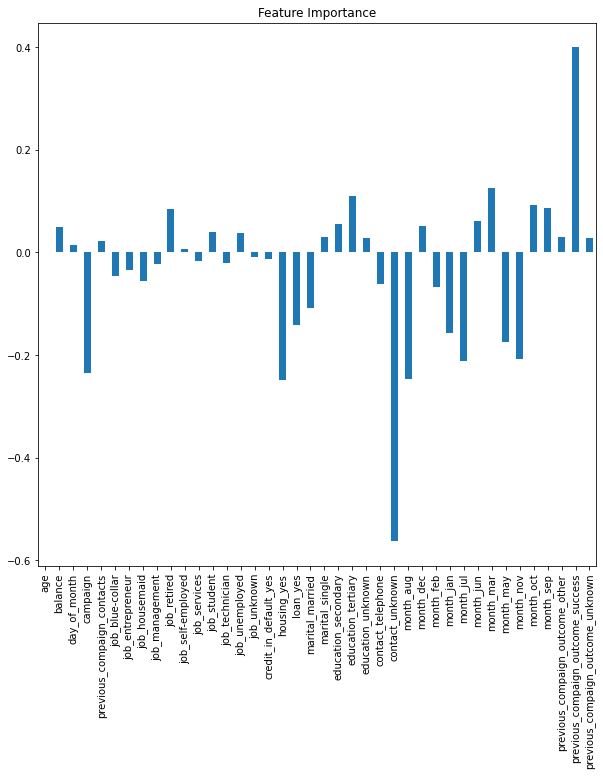

In [101]:
# Visualize feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False,figsize = (10,10));

# **MODEL 2: With Balanced Target Variable**

In [102]:
# Assainging our X and y values for testing various models
X = bank_data_new.drop('Subscribed_yes',axis = 1)
y = bank_data_new['Subscribed_yes']

## There are many methods to overcome imbalanced datasets in classification modeling by oversampling the minority class or undersampling the majority class. To increase the model performance even further, many researchers suggest combining oversampling and undersampling methods to balance the dataset better.

## **Balancing our data using SMOTEENN**

### **This** method combines the SMOTE ability to generate synthetic examples for minority class and ENN ability to delete some observations from both classes that are identified as having different class between the observation’s class and its K-nearest neighbor majority class.

In [103]:
#importing smoteen from imblearn
from collections import Counter
from imblearn.combine import SMOTEENN 
SMOTEENN = SMOTEENN()

print('Original dataset shape %s' % Counter(y))
# fitting our imbalanced data into Smoteen
X_res, y_res = SMOTEENN.fit_resample(X, y)

print('new  dataset shape %s' % Counter(y_res))

Original dataset shape Counter({0: 39922, 1: 5289})
new  dataset shape Counter({1: 34490, 0: 22026})


In [104]:
#Dividing data in test and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=0)
print('train:', len(X_train), 'test:', len(X_test))

train: 45212 test: 11304


### Data scaling will be done as follows :

In [105]:
#importing standardscaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# fitting our train data in scaler
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# **LogisticRegression**

In [106]:
# instantiate a logistic regression model, and fit with X and y
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
# fitting x samples and y classes 
model = model.fit(X_train, y_train)

# check the accuracy on the training set
model.score(X_train, y_train)

0.9097805892240998

### Evaluating Metrics

In [107]:
# predict will give the predited result for test set
y_pred = model.predict(X_test)
print(y_pred)

[1 1 1 ... 1 0 0]


Confusion Matrix:


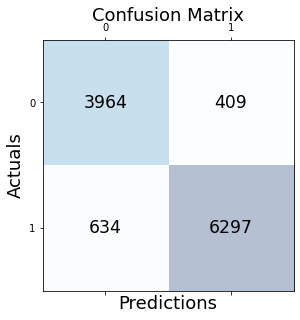



Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.91      0.88      4373
           1       0.94      0.91      0.92      6931

    accuracy                           0.91     11304
   macro avg       0.90      0.91      0.90     11304
weighted avg       0.91      0.91      0.91     11304



Accuracy ON TEST SET : 0.9077317763623496


In [108]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
# Print the confusion matrix using Matplotlib
fig, ax = plt.subplots(figsize=(4.5, 6))
ax.matshow(result, cmap=plt.cm.Blues, alpha=0.3)
for i in range(result.shape[0]):
    for j in range(result.shape[1]):
        ax.text(x=j, y=i,s=result[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()
print('\n')
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
print('\n')
# Calculate the accuracy of the model
result2 = accuracy_score(y_test,y_pred)
print("Accuracy ON TEST SET :",result2)

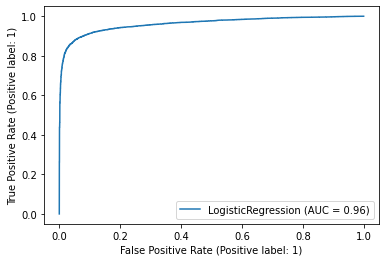

In [109]:
# Plot ROC curve 
plot_roc_curve(model, X_test, y_test);

# **K-Nearest Neighbours Classifier**

In [110]:
# Import necessary modules
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
# fitting x samples and y classes  
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [111]:
# predicting on test data
y_pred = knn.predict(X_test)
y_pred

array([1, 1, 1, ..., 1, 0, 0], dtype=uint8)

### Evaluating Metrics

Confusion Matrix:


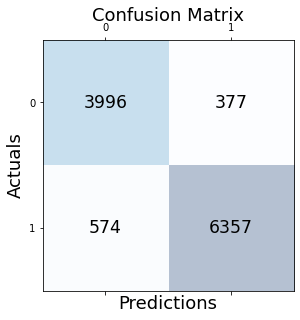



Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.91      0.89      4373
           1       0.94      0.92      0.93      6931

    accuracy                           0.92     11304
   macro avg       0.91      0.92      0.91     11304
weighted avg       0.92      0.92      0.92     11304



Accuracy on test data: 0.9158704883227177


In [112]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
# Print the confusion matrix using Matplotlib
fig, ax = plt.subplots(figsize=(4.5, 6))
ax.matshow(result, cmap=plt.cm.Blues, alpha=0.3)
for i in range(result.shape[0]):
    for j in range(result.shape[1]):
        ax.text(x=j, y=i,s=result[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()
print('\n')
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
print('\n')
# Calculate the accuracy of the model
result2 = accuracy_score(y_test,y_pred)
print("Accuracy on test data:",result2)

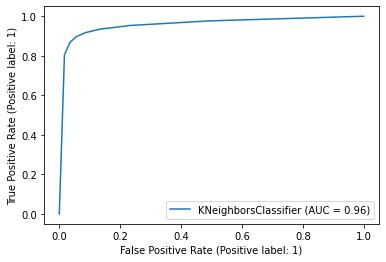

In [113]:
# Plot ROC curve 
plot_roc_curve(knn, X_test, y_test);

## **Support Vector Machines(SVMs)**

In [114]:
# import support vector classifier 
# "Support Vector Classifier"
from sklearn.svm import SVC  
clf = SVC(kernel='rbf') 
  
# fitting x samples and y classes 
clf.fit(X_train, y_train) 
#predicting on test data
y_pred = clf.predict(X_test)
print('\n',y_pred)


 [1 1 1 ... 1 0 0]


### Evaluating Metrics

Confusion Matrix:


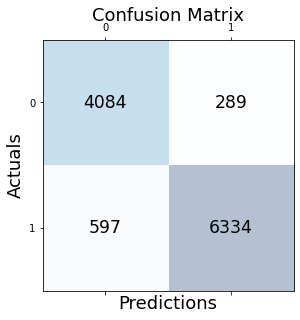



Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.93      0.90      4373
           1       0.96      0.91      0.93      6931

    accuracy                           0.92     11304
   macro avg       0.91      0.92      0.92     11304
weighted avg       0.92      0.92      0.92     11304



Accuracy on test data: 0.9216206652512385


In [115]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
# Print the confusion matrix using Matplotlib
fig, ax = plt.subplots(figsize=(4.5, 6))
ax.matshow(result, cmap=plt.cm.Blues, alpha=0.3)
for i in range(result.shape[0]):
    for j in range(result.shape[1]):
        ax.text(x=j, y=i,s=result[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()
print('\n')
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
print('\n')
# Calculate the accuracy of the model
result2 = accuracy_score(y_test,y_pred)
print("Accuracy on test data:",result2)

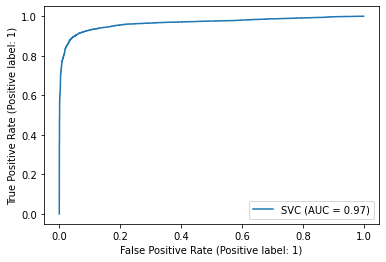

In [116]:
# Plot ROC curve 
plot_roc_curve(clf, X_test, y_test);

# **HYPERPARAMETER OPTIMIZATION**

### **Using GridSearchCv on logistic regression**

In [117]:
# grid search logistic regression model on imbalanced data
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

# define model
model = LogisticRegression()
# define evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define search space
space = dict()
space['solver'] = ['liblinear']
space['penalty'] = ['l1', 'l2']
space['C'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10,20,100]
# define search
search = GridSearchCV(model, space, scoring='accuracy', n_jobs=-1, cv=cv)
# execute search
result = search.fit(X_train, y_train)
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.9103409815246837
Best Hyperparameters: {'C': 0.001, 'penalty': 'l2', 'solver': 'liblinear'}


In [118]:
#predicting on test data
y_pred_logistic = result.predict(X_test)

In [119]:
# accuracy on test data
result2 = accuracy_score(y_test,y_pred_logistic)
print("Accuracy on test data:",result2)

Accuracy on test data: 0.9084394904458599


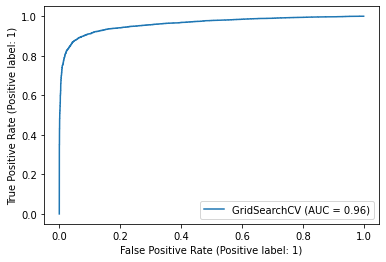

In [120]:
# Plot ROC curve 
plot_roc_curve(result, X_test, y_test);

## **Using RandomSearchCv on logisticregression**

In [121]:
# random search logistic regression model 
from scipy.stats import loguniform
from sklearn.model_selection import RandomizedSearchCV

# define model
model1 = LogisticRegression()
# define evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define search space
space = dict()
space['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
space['penalty'] = ['none', 'l1', 'l2', 'elasticnet']
space['C'] = loguniform(1e-5, 100)
# define search
search = RandomizedSearchCV(model1, space, n_iter=50, scoring='accuracy', n_jobs=-1, cv=cv, random_state=1)
# execute search
result = search.fit(X_train, y_train)
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.90978801467152
Best Hyperparameters: {'C': 0.004556412214150533, 'penalty': 'l2', 'solver': 'newton-cg'}


In [123]:
# predicting on testd data
y_pred_logistic = result.predict(X_test)

In [122]:
#accuracy on test data
result2 = accuracy_score(y_test,y_pred_logistic)
print("Accuracy on test data:",result2)

Accuracy on test data: 0.9084394904458599


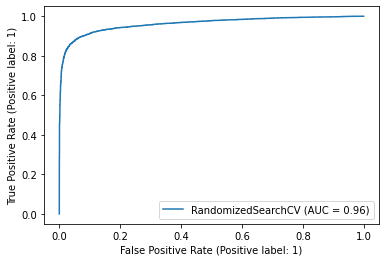

In [124]:
# Plot ROC curve 
plot_roc_curve(result, X_test, y_test);

## **Feature Importance**

In [ ]:
# Fit an instance of LogisticRegression
clf = LogisticRegression(C= 0.013653836035069424,
                         solver="liblinear")

clf.fit(X_train, y_train);

In [ ]:
# Check coef_
clf.coef_

array([[-0.07958063,  0.11633799, -0.09002366,  3.14928546, -0.29987099,
         0.01652107, -0.62670979, -0.23448108, -0.29037096, -0.49216988,
        -0.2013815 , -0.23408075, -0.36805972, -0.10891813, -0.41052178,
        -0.23939127, -0.13000726, -0.01431488, -0.71860564, -0.33004342,
        -0.43818103, -0.27804837, -0.48771973, -0.23898671, -0.12738895,
        -0.10342074, -0.60590369, -0.75529505, -0.07304413, -0.38973715,
        -0.40776   , -0.79235098, -0.40024791, -0.03945978, -0.88357492,
        -0.59119941, -0.1085009 , -0.10181207, -0.15748421,  0.3179183 ,
        -0.55695277]])

In [ ]:
# Match coef's of features to columns
feature_dict = dict(zip(bank_data_new.columns, list(clf.coef_[0])))

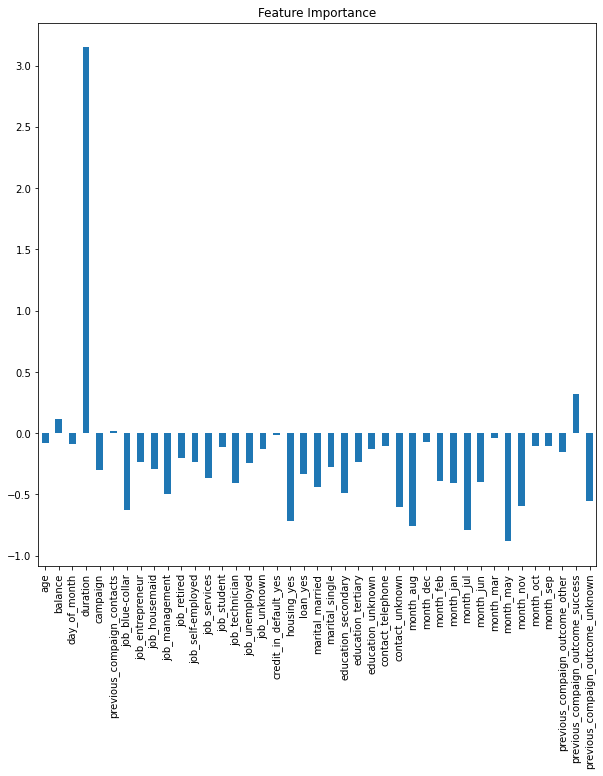

In [ ]:
# Visualize feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False,figsize = (10,10));

## **CONCLUSION FROM MODELLLING**

In comparision with all 3 classification algorithmns 'logistic regression' performed well with accuracy of around 89% in model 1 after hypertuning and with accuracy of around 90% in model 2 after hypertuning.

Hyperparameters didnt had much effect on in both our models

From the Feature Importance  chart  of logistic regression of both models we find out that "Duration" ,"Balance" and "previous_campaign_outcome_sucess" are the  imporatant features that drive the decision of the customer to purchase the term deposit or not.

so overall we can say bank should try to launch more campaigns and should focus on customers with high bank balance, also they should try to connect more with people through cellular calls 

